# in this section we will analayze and visulaize the data

# 1-DATA PREPROCESSING

In [2]:
#import nesseccary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [3]:
#load the data into pandas data frame
data = pd.read_csv("weather.csv") 

In [95]:
#print the data
data

dt            dt_iso  timezone        city_name        lat  \
0        946684800     1/1/2000 0:00     12600  Tehran Province  35.502195   
1        946688400     1/1/2000 1:00     12600  Tehran Province  35.502195   
2        946692000     1/1/2000 2:00     12600  Tehran Province  35.502195   
3        946695600     1/1/2000 3:00     12600  Tehran Province  35.502195   
4        946699200     1/1/2000 4:00     12600  Tehran Province  35.502195   
5        946702800     1/1/2000 5:00     12600  Tehran Province  35.502195   
6        946706400     1/1/2000 6:00     12600  Tehran Province  35.502195   
7        946710000     1/1/2000 7:00     12600  Tehran Province  35.502195   
8        946713600     1/1/2000 8:00     12600  Tehran Province  35.502195   
9        946717200     1/1/2000 9:00     12600  Tehran Province  35.502195   
10       946720800    1/1/2000 10:00     12600  Tehran Province  35.502195   
11       946724400    1/1/2000 11:00     12600  Tehran Province  35.502195   
12       946728000    1/1/2000 12:00     12600  Tehran Province  35.502195   
13       946731600    1/1/2000 13:00     12600  Tehran Province  35.502195   
14       946735200    1/1/2000 14:00     12600  Tehran Province  35.502195   
15       946738800    1/1/2000 15:00     12600  Tehran Province  35.502195   
16       946742400    1/1/2000 16:00     12600  Tehran Province  35.502195   
17       946746000    1/1/2000 17:00     12600  Tehran Province  35.502195   
18       946749600    1/1/2000 18:00     12600  Tehran Province  35.502195   
19       946753200    1/1/2000 19:00     12600  Tehran Province  35.502195   
20       946756800    1/1/2000 20:00     12600  Tehran Province  35.502195   
21       946760400    1/1/2000 21:00     12600  Tehran Province  35.502195   
22       946764000    1/1/2000 22:00     12600  Tehran Province  35.502195   
23       946767600    1/1/2000 23:00     12600  Tehran Province  35.502195   
24       946771200     1/2/2000 0:00     12600  Tehran Province  35.502195   
25       946774800     1/2/2000 1:00     12600  Tehran Province  35.502195   
26       946778400     1/2/2000 2:00     12600  Tehran Province  35.502195   
27       946782000     1/2/2000 3:00     12600  Tehran Province  35.502195   
28       946785600     1/2/2000 4:00     12600  Tehran Province  35.502195   
29       946789200     1/2/2000 5:00     12600  Tehran Province  35.502195   
...            ...               ...       ...              ...        ...   
175883  1577815200  12/31/2019 18:00     12600  Tehran Province  35.502195   
175884  1577818800  12/31/2019 19:00     12600  Tehran Province  35.502195   
175885  1577822400  12/31/2019 20:00     12600  Tehran Province  35.502195   
175886  1577826000  12/31/2019 21:00     12600  Tehran Province  35.502195   
175887  1577829600  12/31/2019 22:00     12600  Tehran Province  35.502195   
175888  1577833200  12/31/2019 23:00     12600  Tehran Province  35.502195   
175889  1577836800     1/1/2020 0:00     12600  Tehran Province  35.502195   
175890  1577840400     1/1/2020 1:00     12600  Tehran Province  35.502195   
175891  1577844000     1/1/2020 2:00     12600  Tehran Province  35.502195   
175892  1577847600     1/1/2020 3:00     12600  Tehran Province  35.502195   
175893  1577851200     1/1/2020 4:00     12600  Tehran Province  35.502195   
175894  1577854800     1/1/2020 5:00     12600  Tehran Province  35.502195   
175895  1577858400     1/1/2020 6:00     12600  Tehran Province  35.502195   
175896  1577862000     1/1/2020 7:00     12600  Tehran Province  35.502195   
175897  1577865600     1/1/2020 8:00     12600  Tehran Province  35.502195   
175898  1577869200     1/1/2020 9:00     12600  Tehran Province  35.502195   
175899  1577872800    1/1/2020 10:00     12600  Tehran Province  35.502195   
175900  1577876400    1/1/2020 11:00     12600  Tehran Province  35.502195   
175901  1577880000    1/1/2020 12:00     12600  Tehran Province  35.502195   
175902  1577883600    1/1/2020 13:00  

In [96]:
#print the shape of data, we have 25 feature for 20 years , one observation for each hour.
print("Dataset shape is ", data.shape)

Dataset shape is  (175913, 25)


In [97]:
#print data set data types

print("Dataset data types")
print("            ", "\n")
print(data.dtypes, "\n")

Dataset data types
             

dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure               float64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object 



## NOTE
### INT64 is unteger number
### FLOAT64 is float number
### OBJECT is Text or mixed numeric and non-numeric values
### CATEGORY is Finite list of text values


In [4]:
#the categories of weather_main column
data['weather_main'].unique()

array(['Clear', 'Haze', 'Clouds', 'Rain', 'Mist', 'Snow', 'Thunderstorm',
       'Dust', 'Drizzle', 'Fog', 'Tornado', 'Smoke', 'Squall', 'Sand'],
      dtype=object)

In [7]:
#the categories of weather_description column
data['weather_description'].unique()


array(['sky is clear', 'haze', 'broken clouds', 'overcast clouds',
       'light intensity shower rain', 'moderate rain', 'mist',
       'few clouds', 'light rain', 'scattered clouds', 'light snow',
       'snow', 'light shower snow', 'thunderstorm',
       'thunderstorm with rain', 'dust', 'heavy intensity rain',
       'proximity thunderstorm', 'shower rain', 'drizzle', 'fog',
       'light intensity drizzle', 'proximity tornado', 'very heavy rain',
       'heavy intesity shower rain', 'smoke', 'shower sleet',
       'heavy snow', 'thunderstorm with heavy rain', 'shower snow',
       'freezing rain', 'proximity Sand/Dust Whirls', 'proximity squalls',
       'sand', 'rain and drizzle', ' light shower sleet',
       'thunderstorm with light rain', 'light thunderstorm',
       'light rain and snow', 'proximity shower rain',
       'proximity moderate rain', 'heavy thunderstorm'], dtype=object)

In [16]:
#print the mean of thunderstorm state according to weather_main column
data['weather_main'].str.contains("Thunderstorm").mean()

0.004502225531939083

In [20]:
#print the number of any category in weather according to weather_main column
es = data.groupby("weather_main")["temp"].count()
es

weather_main
Clear           73761
Clouds          79815
Drizzle            73
Dust              926
Fog               241
Haze            10896
Mist             3284
Rain             5382
Sand               23
Smoke              22
Snow              691
Squall              6
Thunderstorm      792
Tornado             1
Name: temp, dtype: int64

In [98]:
#convert the type of WEATHER_MAIN from object to category

data["weather_main"] = data["weather_main"].astype('category')
data.dtypes

dt                        int64
dt_iso                   object
timezone                  int64
city_name                object
lat                     float64
lon                     float64
temp                    float64
feels_like              float64
temp_min                float64
temp_max                float64
pressure                float64
sea_level               float64
grnd_level              float64
humidity                  int64
wind_speed              float64
wind_deg                  int64
rain_1h                 float64
rain_3h                 float64
snow_1h                 float64
snow_3h                 float64
clouds_all                int64
weather_id                int64
weather_main           category
weather_description      object
weather_icon             object
dtype: object

In [99]:
#code the WEATHER_MAIN to numbers represent the categories.
#add new column which is coded data named WEATHER_MAIN_CAT instead of WEATHER_MAIN and we will delet it later

data["weather_main_cat"] = data["weather_main"].cat.codes
data

dt            dt_iso  timezone        city_name        lat  \
0        946684800     1/1/2000 0:00     12600  Tehran Province  35.502195   
1        946688400     1/1/2000 1:00     12600  Tehran Province  35.502195   
2        946692000     1/1/2000 2:00     12600  Tehran Province  35.502195   
3        946695600     1/1/2000 3:00     12600  Tehran Province  35.502195   
4        946699200     1/1/2000 4:00     12600  Tehran Province  35.502195   
5        946702800     1/1/2000 5:00     12600  Tehran Province  35.502195   
6        946706400     1/1/2000 6:00     12600  Tehran Province  35.502195   
7        946710000     1/1/2000 7:00     12600  Tehran Province  35.502195   
8        946713600     1/1/2000 8:00     12600  Tehran Province  35.502195   
9        946717200     1/1/2000 9:00     12600  Tehran Province  35.502195   
10       946720800    1/1/2000 10:00     12600  Tehran Province  35.502195   
11       946724400    1/1/2000 11:00     12600  Tehran Province  35.502195   
12       946728000    1/1/2000 12:00     12600  Tehran Province  35.502195   
13       946731600    1/1/2000 13:00     12600  Tehran Province  35.502195   
14       946735200    1/1/2000 14:00     12600  Tehran Province  35.502195   
15       946738800    1/1/2000 15:00     12600  Tehran Province  35.502195   
16       946742400    1/1/2000 16:00     12600  Tehran Province  35.502195   
17       946746000    1/1/2000 17:00     12600  Tehran Province  35.502195   
18       946749600    1/1/2000 18:00     12600  Tehran Province  35.502195   
19       946753200    1/1/2000 19:00     12600  Tehran Province  35.502195   
20       946756800    1/1/2000 20:00     12600  Tehran Province  35.502195   
21       946760400    1/1/2000 21:00     12600  Tehran Province  35.502195   
22       946764000    1/1/2000 22:00     12600  Tehran Province  35.502195   
23       946767600    1/1/2000 23:00     12600  Tehran Province  35.502195   
24       946771200     1/2/2000 0:00     12600  Tehran Province  35.502195   
25       946774800     1/2/2000 1:00     12600  Tehran Province  35.502195   
26       946778400     1/2/2000 2:00     12600  Tehran Province  35.502195   
27       946782000     1/2/2000 3:00     12600  Tehran Province  35.502195   
28       946785600     1/2/2000 4:00     12600  Tehran Province  35.502195   
29       946789200     1/2/2000 5:00     12600  Tehran Province  35.502195   
...            ...               ...       ...              ...        ...   
175883  1577815200  12/31/2019 18:00     12600  Tehran Province  35.502195   
175884  1577818800  12/31/2019 19:00     12600  Tehran Province  35.502195   
175885  1577822400  12/31/2019 20:00     12600  Tehran Province  35.502195   
175886  1577826000  12/31/2019 21:00     12600  Tehran Province  35.502195   
175887  1577829600  12/31/2019 22:00     12600  Tehran Province  35.502195   
175888  1577833200  12/31/2019 23:00     12600  Tehran Province  35.502195   
175889  1577836800     1/1/2020 0:00     12600  Tehran Province  35.502195   
175890  1577840400     1/1/2020 1:00     12600  Tehran Province  35.502195   
175891  1577844000     1/1/2020 2:00     12600  Tehran Province  35.502195   
175892  1577847600     1/1/2020 3:00     12600  Tehran Province  35.502195   
175893  1577851200     1/1/2020 4:00     12600  Tehran Province  35.502195   
175894  1577854800     1/1/2020 5:00     12600  Tehran Province  35.502195   
175895  1577858400     1/1/2020 6:00     12600  Tehran Province  35.502195   
175896  1577862000     1/1/2020 7:00     12600  Tehran Province  35.502195   
175897  1577865600     1/1/2020 8:00     12600  Tehran Province  35.502195   
175898  1577869200     1/1/2020 9:00     12600  Tehran Province  35.502195   
175899  1577872800    1/1/2020 10:00     12600  Tehran Province  35.502195   
175900  1577876400    1/1/2020 11:00     12600  Tehran Province  35.502195   
175901  1577880000    1/1/2020 12:00     12600  Tehran Province  35.502195   
175902  1577883600    1/1/2020 13:00  

In [100]:
#do same act with WEATHER_DESCRPTION 
data["weather_description"] = data["weather_description"].astype('category')
data["weather_description_cat"] = data["weather_description"].cat.codes
data.head()

dt         dt_iso  timezone        city_name        lat       lon  \
0  946684800  1/1/2000 0:00     12600  Tehran Province  35.502195  51.32691   
1  946688400  1/1/2000 1:00     12600  Tehran Province  35.502195  51.32691   
2  946692000  1/1/2000 2:00     12600  Tehran Province  35.502195  51.32691   
3  946695600  1/1/2000 3:00     12600  Tehran Province  35.502195  51.32691   
4  946699200  1/1/2000 4:00     12600  Tehran Province  35.502195  51.32691   

   temp  feels_like  temp_min  temp_max           ...             rain_3h  \
0  4.78        1.58      4.78      4.78           ...                 NaN   
1  4.80        1.51      4.80      4.80           ...                 NaN   
2  4.72        1.40      4.72      4.72           ...                 NaN   
3  3.42        0.06      3.42      3.42           ...                 NaN   
4  3.62        0.25      3.62      3.62           ...                 NaN   

   snow_1h  snow_3h  clouds_all  weather_id  weather_main  \
0      NaN      NaN           0         800         Clear   
1      NaN      NaN           0         800         Clear   
2      NaN      NaN           0         800         Clear   
3      NaN      NaN           0         800         Clear   
4      NaN      NaN           0         800         Clear   

   weather_description  weather_icon  weather_main_cat  \
0         sky is clear           01n                 0   
1         sky is clear           01n                 0   
2         sky is clear           01n                 0   
3         sky is clear           01n                 0   
4         sky is clear           01d                 0   

   weather_description_cat  
0                       34  
1                       34  
2                       34  
3                       34  
4                       34  

[5 rows x 27 columns]

In [101]:
#new datashape is this becuse we add 2 new columns
data.shape

(175913, 27)

In [102]:
#Now we will delet the unwanted columns
#we deleted 11 columns
data = data.drop(columns="dt")
data = data.drop(columns="timezone")
data = data.drop(columns="lon")
data = data.drop(columns="sea_level")
data = data.drop(columns="grnd_level")
data = data.drop(columns="snow_3h")
data = data.drop(columns="snow_1h")
data = data.drop(columns="weather_icon")
data = data.drop(columns="weather_main")
data = data.drop(columns="weather_description")
data = data.drop(columns="lat")


In [103]:
#new shape is 16
#27-11=16
data.shape

(175913, 16)

In [104]:
#check columns and data types again
data.dtypes

dt_iso                      object
city_name                   object
temp                       float64
feels_like                 float64
temp_min                   float64
temp_max                   float64
pressure                   float64
humidity                     int64
wind_speed                 float64
wind_deg                     int64
rain_1h                    float64
rain_3h                    float64
clouds_all                   int64
weather_id                   int64
weather_main_cat              int8
weather_description_cat       int8
dtype: object

In [105]:
#fill the missing value with ZERO
data.fillna(0)

dt_iso        city_name   temp  feels_like  temp_min  \
0          1/1/2000 0:00  Tehran Province   4.78        1.58      4.78   
1          1/1/2000 1:00  Tehran Province   4.80        1.51      4.80   
2          1/1/2000 2:00  Tehran Province   4.72        1.40      4.72   
3          1/1/2000 3:00  Tehran Province   3.42        0.06      3.42   
4          1/1/2000 4:00  Tehran Province   3.62        0.25      3.62   
5          1/1/2000 5:00  Tehran Province   5.32        2.14      5.32   
6          1/1/2000 6:00  Tehran Province   9.25        6.51      9.25   
7          1/1/2000 7:00  Tehran Province  15.00       12.63     15.00   
8          1/1/2000 8:00  Tehran Province  15.00       12.63     15.00   
9          1/1/2000 9:00  Tehran Province  16.00       13.65     16.00   
10        1/1/2000 10:00  Tehran Province  16.00       13.65     16.00   
11        1/1/2000 11:00  Tehran Province  17.00       14.85     17.00   
12        1/1/2000 12:00  Tehran Province  17.00       14.85     17.00   
13        1/1/2000 13:00  Tehran Province  14.00       12.46     14.00   
14        1/1/2000 14:00  Tehran Province  14.00       12.61     14.00   
15        1/1/2000 15:00  Tehran Province  12.00       10.74     12.00   
16        1/1/2000 16:00  Tehran Province  11.00        9.70     11.00   
17        1/1/2000 17:00  Tehran Province  10.00        8.29     10.00   
18        1/1/2000 18:00  Tehran Province   9.00        6.90      9.00   
19        1/1/2000 19:00  Tehran Province   9.00        6.76      9.00   
20        1/1/2000 20:00  Tehran Province   9.00        6.71      9.00   
21        1/1/2000 21:00  Tehran Province   3.35        0.18      3.35   
22        1/1/2000 22:00  Tehran Province   8.00        5.74      8.00   
23        1/1/2000 23:00  Tehran Province   8.00        5.76      8.00   
24         1/2/2000 0:00  Tehran Province   8.00        5.75      8.00   
25         1/2/2000 1:00  Tehran Province   8.00        4.90      8.00   
26         1/2/2000 2:00  Tehran Province   8.00        4.90      8.00   
27         1/2/2000 3:00  Tehran Province   8.00        4.76      8.00   
28         1/2/2000 4:00  Tehran Province   8.00        4.76      8.00   
29         1/2/2000 5:00  Tehran Province   4.28        0.59      4.28   
...                  ...              ...    ...         ...       ...   
175883  12/31/2019 18:00  Tehran Province   3.29        0.01      1.00   
175884  12/31/2019 19:00  Tehran Province   3.32       -0.65      1.00   
175885  12/31/2019 20:00  Tehran Province   2.79       -1.09      2.00   
175886  12/31/2019 21:00  Tehran Province   2.39       -1.55      2.00   
175887  12/31/2019 22:00  Tehran Province   2.79       -2.66      2.00   
175888  12/31/2019 23:00  Tehran Province   2.63       -1.45      1.00   
175889     1/1/2020 0:00  Tehran Province   2.11       -3.96      1.00   
175890     1/1/2020 1:00  Tehran Province   1.53       -4.60      1.00   
175891     1/1/2020 2:00  Tehran Province   1.20       -3.65     -1.00   
175892     1/1/2020 3:00  Tehran Province   0.67       -4.38     -2.00   
175893     1/1/2020 4:00  Tehran Province   0.96       -3.48     -2.00   
175894     1/1/2020 5:00  Tehran Province   1.98       -2.47     -1.00   
175895     1/1/2020 6:00  Tehran Province   3.25        0.29     -1.00   
175896     1/1/2020 7:00  Tehran Province   4.79        0.04      3.00   
175897     1/1/2020 8:00  Tehran Province   6.20        2.76      4.00   
175898     1/1/2020 9:00  Tehran Province   7.75        3.56      6.00   
175899    1/1/2020 10:00  Tehran Province   9.33        3.42      7.00   
175900    1/1/2020 11:00  Tehran Province   9.79        4.28      7.00   
175901    1/1/2020 12:00  Tehran Province   9.79        4.98      7.00   
175902    1/1/2020 13:00  Tehran Province   9.09        4.56      7.00   
175903    1/1/2020 14:00  Tehran Province   7.74        2.43      6.00   
175904    1/1/2020 15:00  Tehran Province   7.74        2.85      6.00   
175905    1/1/2020 16:

# 2-STATISTICS

## after cleaning data we going to explore the data statistically

In [106]:
# compute statistics such as count , mean,std,min,max
data.describe()


temp     feels_like       temp_min       temp_max  \
count  175913.000000  175913.000000  175913.000000  175913.000000   
mean       17.976527      13.424976      16.655337      19.012911   
std        10.710774      11.148267      10.886376      10.692083   
min       -14.700000     -21.470000     -20.000000     -12.000000   
25%         9.000000       4.330000       8.000000      10.000000   
50%        18.080000      13.690000      17.000000      19.000000   
75%        26.820000      22.650000      25.000000      28.000000   
max        42.700000      41.330000      42.200000      44.000000   

            pressure       humidity     wind_speed       wind_deg     rain_1h  \
count  175913.000000  175913.000000  175913.000000  175913.000000  772.000000   
mean     1014.795616      39.826534       4.229444     221.549726    0.371593   
std         6.167799      22.707722       2.606763     106.239720    0.324465   
min       984.900000       2.000000       0.010000       0.000000    0.110000   
25%      1010.800000      21.000000       2.100000     120.000000    0.160000   
50%      1014.900000      36.000000       3.600000     270.000000    0.260000   
75%      1019.000000      56.000000       5.100000     310.000000    0.450000   
max      1038.700000     100.000000      45.270000     360.000000    2.410000   

       rain_3h     clouds_all     weather_id  weather_main_cat  \
count      2.0  175913.000000  175913.000000     175913.000000   
mean     100.1      27.747182     781.281599          1.207620   
std        0.0      31.923159      68.640950          1.962334   
min      100.1       0.000000     200.000000          0.000000   
25%      100.1       0.000000     800.000000          0.000000   
50%      100.1      20.000000     800.000000          1.000000   
75%      100.1      40.000000     802.000000          1.000000   
max      100.1     100.000000     804.000000         13.000000   

       weather_description_cat  
count            175913.000000  
mean                 21.113511  
std                  13.985232  
min                   0.000000  
25%                   4.000000  
50%                  30.000000  
75%                  34.000000  
max                  41.000000

In [32]:
#print maximum values of features
data.max()

dt                          1577919600
dt_iso                   9/9/2019 9:00
timezone                         16200
city_name              Tehran Province
lat                            35.5022
lon                            51.3269
temp                              42.7
feels_like                       41.33
temp_min                          42.2
temp_max                            44
pressure                        1038.7
sea_level                         None
grnd_level                        None
humidity                           100
wind_speed                       45.27
wind_deg                           360
rain_1h                           2.41
rain_3h                          100.1
snow_1h                           1.82
snow_3h                           None
clouds_all                         100
weather_id                         804
weather_main                   Tornado
weather_description    very heavy rain
weather_icon                       50n
dtype: object

In [33]:
#print minimum values of features
data.min()

dt                               946684800
dt_iso                       1/1/2000 0:00
timezone                             12600
city_name                  Tehran Province
lat                                35.5022
lon                                51.3269
temp                                 -14.7
feels_like                          -21.47
temp_min                               -20
temp_max                               -12
pressure                             984.9
sea_level                             None
grnd_level                            None
humidity                                 2
wind_speed                            0.01
wind_deg                                 0
rain_1h                               0.11
rain_3h                              100.1
snow_1h                               0.11
snow_3h                               None
clouds_all                               0
weather_id                             200
weather_main                         Clear
weather_des

In [31]:
#save new version of cleaned Dataset to use it later in visualazation
data.to_csv("output_filename.csv", index=False, encoding='utf8')


# 3-VISUALAZATION

## we will visulaze the distribution , joint distribution , pdf , correlation heat map

C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hossein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


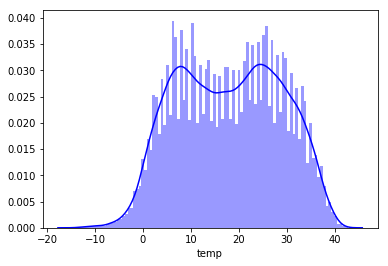

In [108]:
#TEMP ditribution
sns.distplot(data['temp'], color='b', bins=100, hist_kws={'alpha': 0.4});


C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hossein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


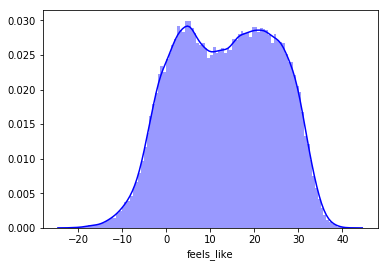

In [109]:
#FEELS LIKE distribution
sns.distplot(data['feels_like'], color='b', bins=100, hist_kws={'alpha': 0.4});

C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hossein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


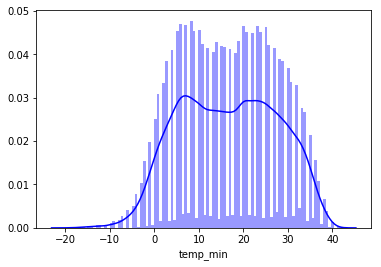

In [110]:
#temp_min disrebution
sns.distplot(data['temp_min'], color='b', bins=100, hist_kws={'alpha': 0.4});

C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hossein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


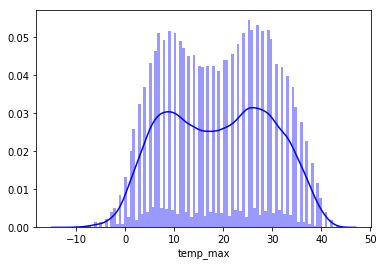

In [111]:
#temp max distribution
sns.distplot(data['temp_max'], color='b', bins=100, hist_kws={'alpha': 0.4});

C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hossein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


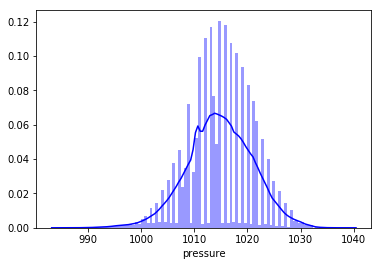

In [112]:
#pressure distrebution
sns.distplot(data['pressure'], color='b', bins=100, hist_kws={'alpha': 0.4});

C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hossein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


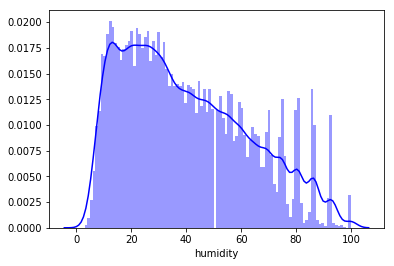

In [113]:
#humidity distrebution
sns.distplot(data['humidity'], color='b', bins=100, hist_kws={'alpha': 0.4});

C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hossein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


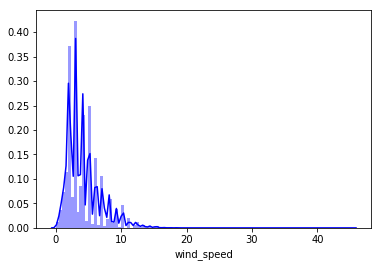

In [114]:
#wind distrebution
sns.distplot(data['wind_speed'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [115]:
#now we select just numerical value to plot them in one graph
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

temp  feels_like  temp_min  temp_max  pressure  humidity  wind_speed  \
0  4.78        1.58      4.78      4.78    1022.0        62        1.36   
1  4.80        1.51      4.80      4.80    1022.0        61        1.45   
2  4.72        1.40      4.72      4.72    1022.0        60        1.45   
3  3.42        0.06      3.42      3.42    1022.0        62        1.36   
4  3.62        0.25      3.62      3.62    1022.0        61        1.38   

   wind_deg  rain_1h  rain_3h  clouds_all  weather_id  
0       355      NaN      NaN           0         800  
1       355      NaN      NaN           0         800  
2       353      NaN      NaN           0         800  
3       350      NaN      NaN           0         800  
4       351      NaN      NaN           0         800

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000DC498080>,
      dtype=object)

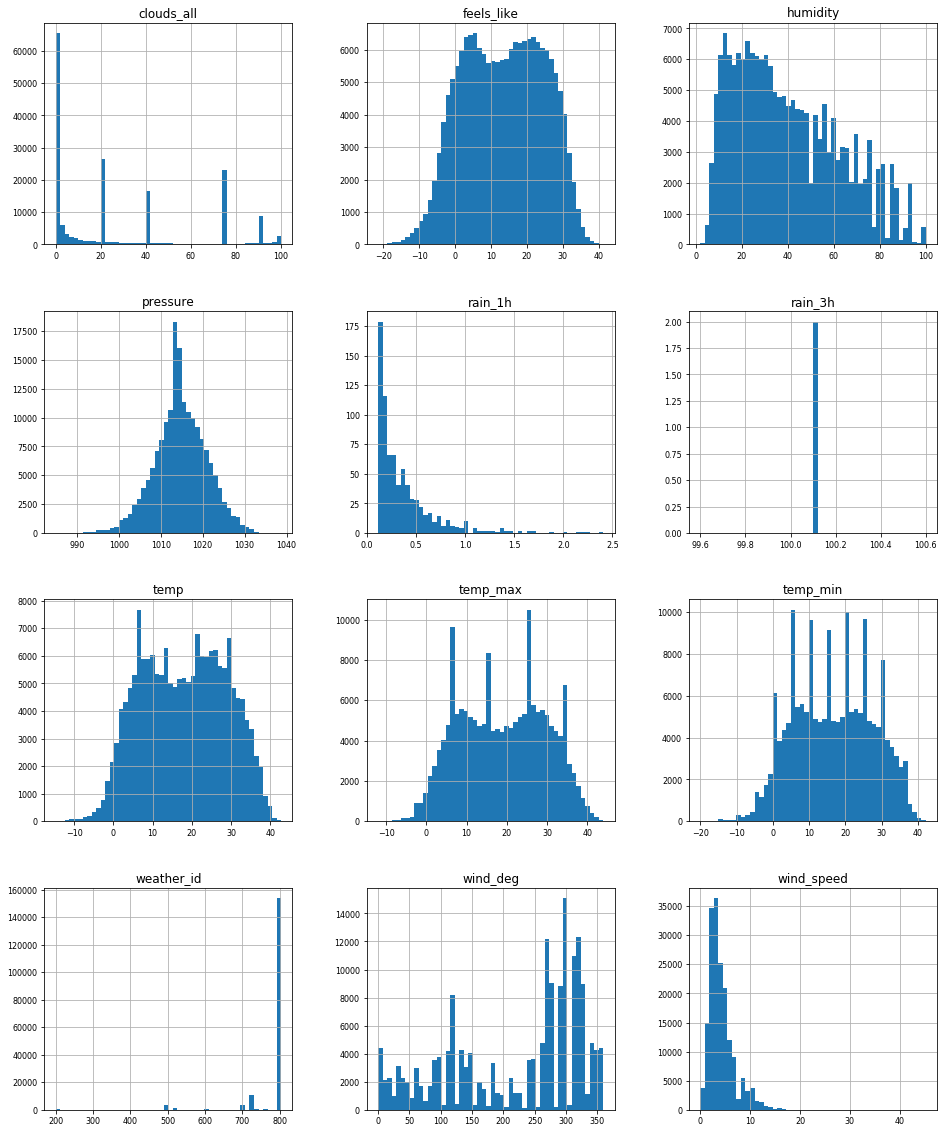

In [116]:
#plot all distribution at one time
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [117]:
#copmute the correlation between features
data.corr()

temp  feels_like  temp_min  temp_max  pressure  \
temp                     1.000000    0.982055  0.992368  0.995654 -0.633709   
feels_like               0.982055    1.000000  0.980613  0.973792 -0.605279   
temp_min                 0.992368    0.980613  1.000000  0.978316 -0.628465   
temp_max                 0.995654    0.973792  0.978316  1.000000 -0.630295   
pressure                -0.633709   -0.605279 -0.628465 -0.630295  1.000000   
humidity                -0.751565   -0.683706 -0.736416 -0.755394  0.404693   
wind_speed               0.088299   -0.075011  0.058040  0.105691 -0.209061   
wind_deg                -0.269520   -0.306387 -0.289337 -0.253577  0.110283   
rain_1h                 -0.153742   -0.105884 -0.122637 -0.172920  0.008289   
rain_3h                       NaN         NaN       NaN       NaN       NaN   
clouds_all              -0.238803   -0.225124 -0.228632 -0.246468  0.095995   
weather_id               0.162772    0.147328  0.152372  0.170261 -0.046861   
weather_main_cat        -0.233846   -0.206414 -0.213876 -0.248095  0.092153   
weather_description_cat  0.092650    0.076555  0.073893  0.107716 -0.028921   

                         humidity  wind_speed  wind_deg   rain_1h  rain_3h  \
temp                    -0.751565    0.088299 -0.269520 -0.153742      NaN   
feels_like              -0.683706   -0.075011 -0.306387 -0.105884      NaN   
temp_min                -0.736416    0.058040 -0.289337 -0.122637      NaN   
temp_max                -0.755394    0.105691 -0.253577 -0.172920      NaN   
pressure                 0.404693   -0.209061  0.110283  0.008289      NaN   
humidity                 1.000000   -0.084773  0.230623  0.284060      NaN   
wind_speed              -0.084773    1.000000  0.293124 -0.069677      NaN   
wind_deg                 0.230623    0.293124  1.000000  0.021285      NaN   
rain_1h                  0.284060   -0.069677  0.021285  1.000000      NaN   
rain_3h                       NaN         NaN       NaN       NaN      NaN   
clouds_all               0.304331   -0.010004 -0.026243  0.249741      NaN   
weather_id              -0.306226   -0.006075 -0.011738  0.748903      NaN   
weather_main_cat         0.381337   -0.055891  0.008845       NaN      NaN   
weather_description_cat -0.144876    0.034134  0.036948  0.748903      NaN   

                         clouds_all  weather_id  weather_main_cat  \
temp                      -0.238803    0.162772         -0.233846   
feels_like                -0.225124    0.147328         -0.206414   
temp_min                  -0.228632    0.152372         -0.213876   
temp_max                  -0.246468    0.170261         -0.248095   
pressure                   0.095995   -0.046861          0.092153   
humidity                   0.304331   -0.306226          0.381337   
wind_speed                -0.010004   -0.006075         -0.055891   
wind_deg                  -0.026243   -0.011738          0.008845   
rain_1h                    0.249741    0.748903               NaN   
rain_3h                         NaN         NaN               NaN   
clouds_all                 1.000000   -0.268002          0.409496   
weather_id                -0.268002    1.000000         -0.862451   
weather_main_cat           0.409496   -0.862451          1.000000   
weather_description_cat   -0.518691    0.070441         -0.336187   

                         weather_description_cat  
temp                                    0.092650  
feels_like                              0.076555  
temp_min                                0.073893  
temp_max                                0.107716  
pressure                               -0.028921  
humidity                               -0.144876  
wind_speed                              0.034134  
wind_deg                                0.036948  
rain_1h                                 0.748903  
rain_3h                                      NaN  
clouds_all                             -0.518691  
weather_id              

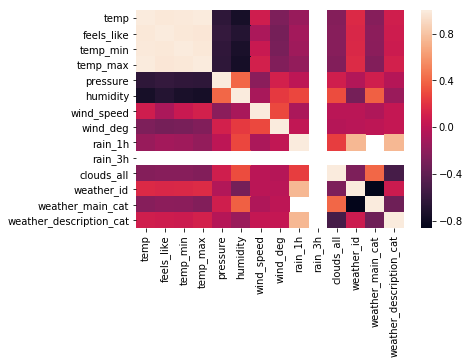

In [118]:
#plot the correlation matrix
sns.heatmap(data.corr())

C:\Users\Hossein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is depre

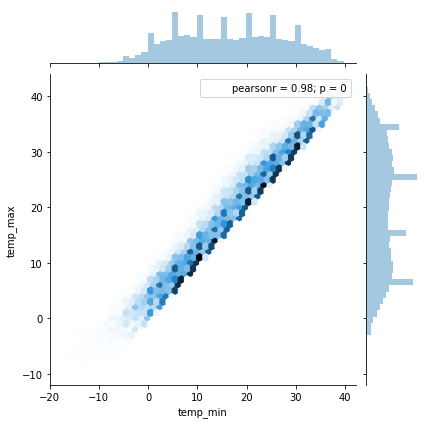

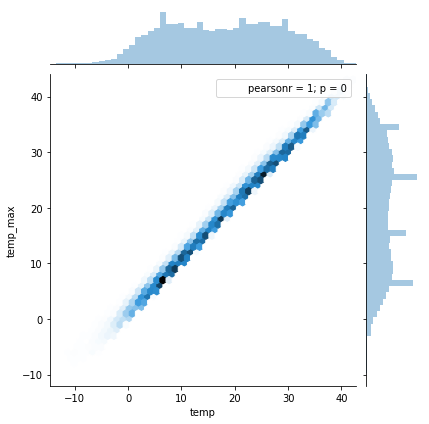

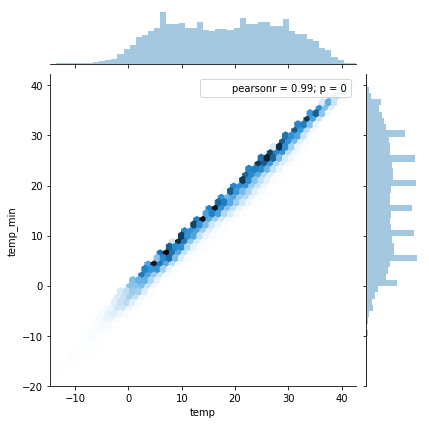

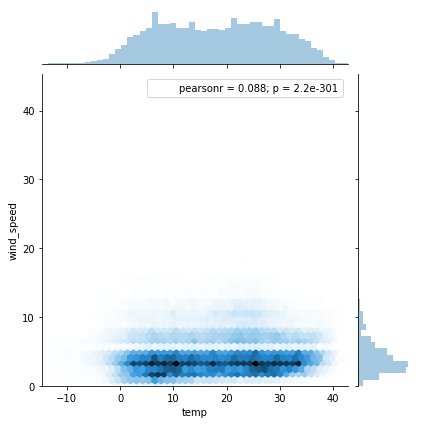

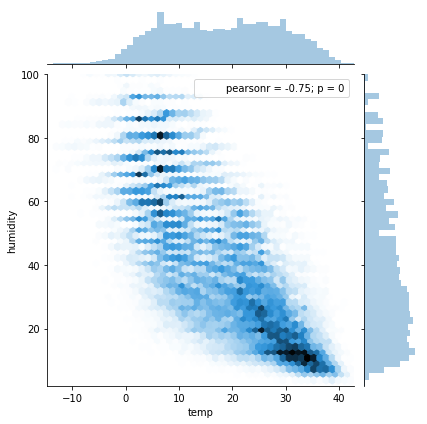

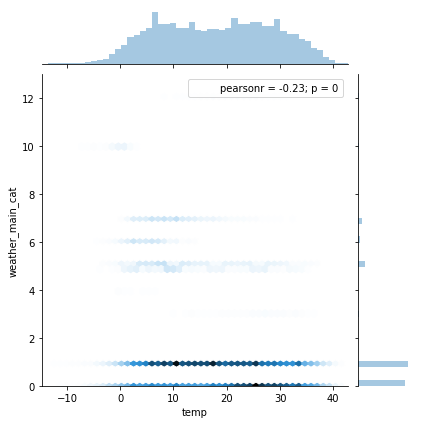

In [119]:
#plot the joint ditribution of some features to see the nature of relation between them
sns.jointplot(x='temp_min', y='temp_max', data=data, kind='hex')
sns.jointplot(x='temp', y='temp_max', data=data, kind='hex')
sns.jointplot(x='temp', y='temp_min', data=data, kind='hex')
sns.jointplot(x='temp', y='wind_speed', data=data, kind='hex')
sns.jointplot(x='temp', y='humidity', data=data, kind='hex')
sns.jointplot(x='temp', y='weather_main_cat', data=data, kind='hex')

C:\Users\Hossein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hossein\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


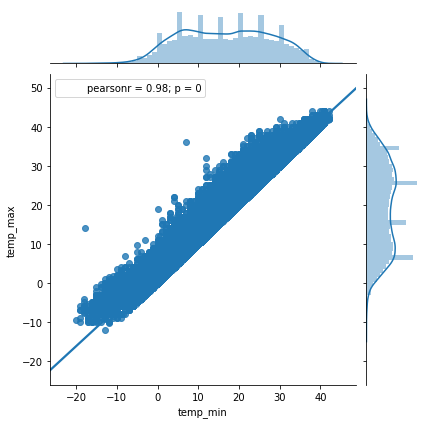

In [120]:
sns.jointplot(x='temp_min', y='temp_max', data=data, kind='reg')

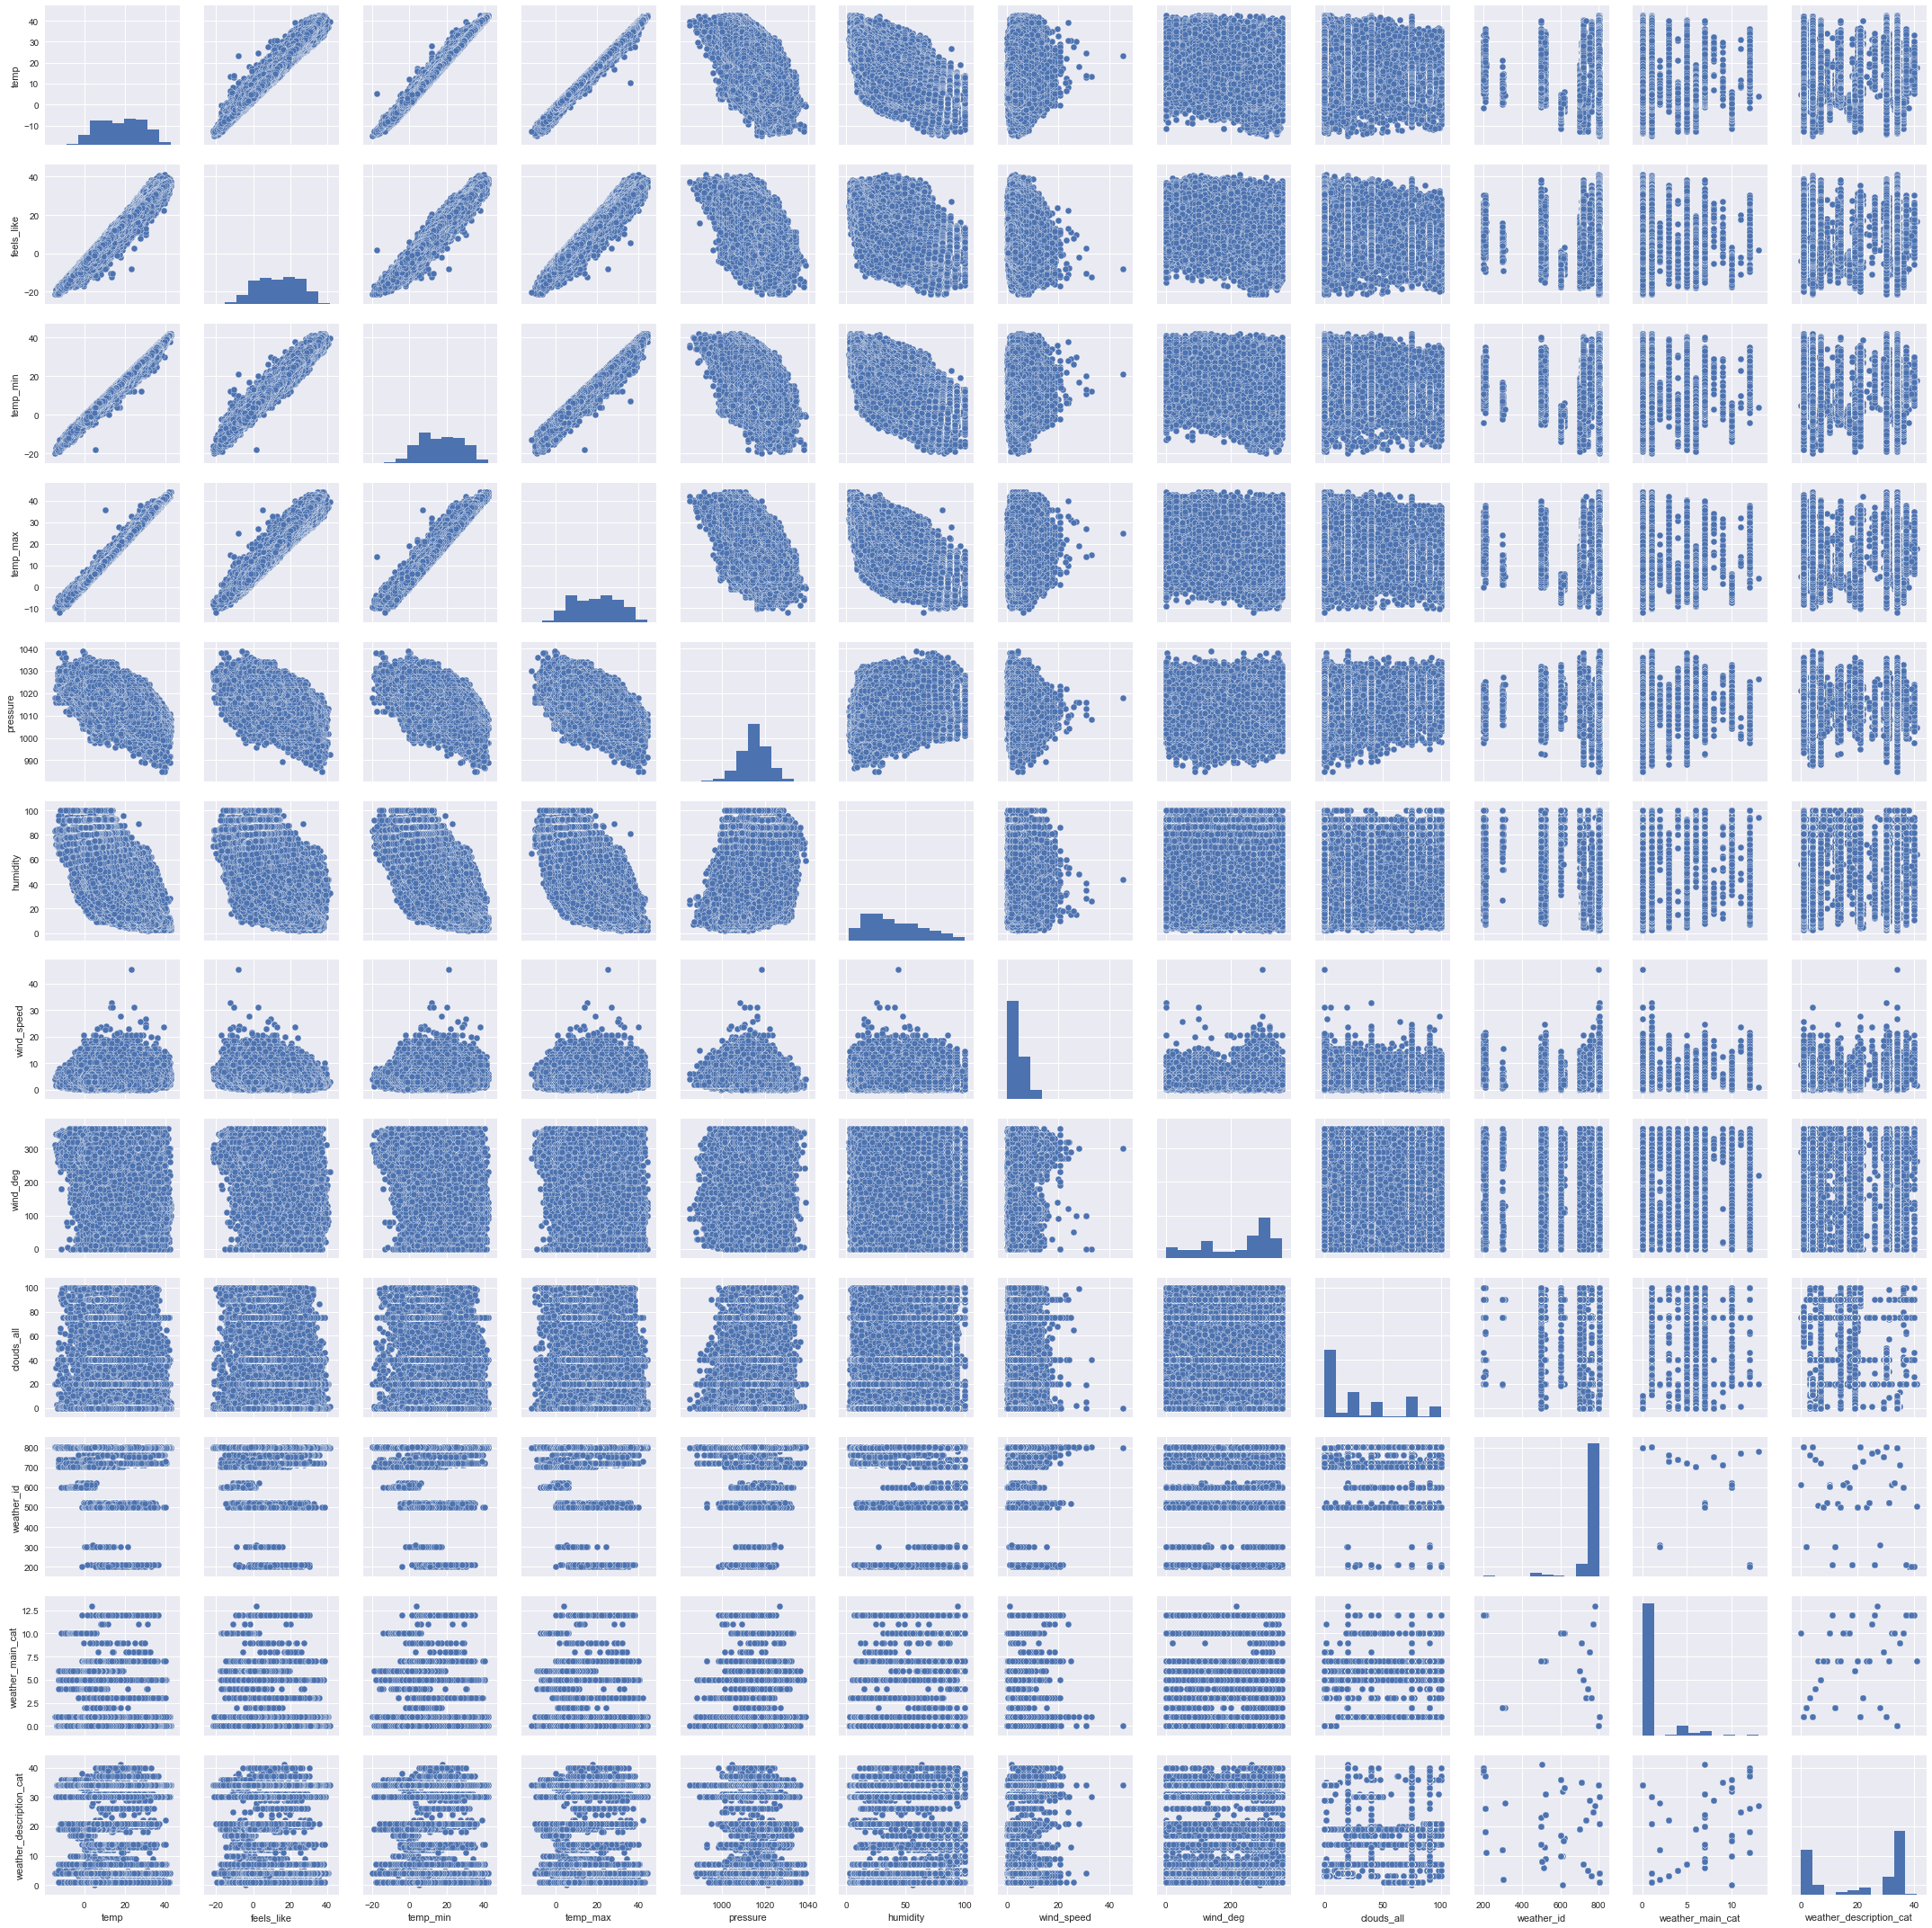

In [126]:
#print all joint distribution using new dataset 
df = pd.read_csv('output_filename.csv')
sns.pairplot(df)

# 4-Time series analysis

<Figure size 720x720 with 0 Axes>

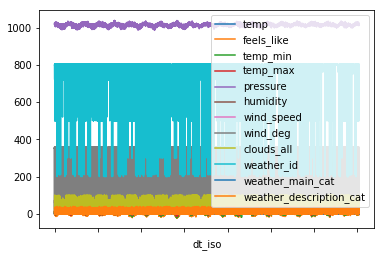

In [10]:
#time series aouto correlation
from pandas import read_csv
import matplotlib.pyplot as plt
series = read_csv('output_filename.csv', header=0, index_col=0)
fig= plt.figure(figsize=(10,10))
series.plot()
plt.show()

In [11]:
data['dt_iso'] = data['dt_iso'].astype('datetime64[ns]')
data['month'] = pd.DatetimeIndex(data['dt_iso']).month
data['date'] = pd.to_datetime(data['dt_iso']).dt.to_period('M')
data = data.set_index('date')
data.head(3)

dt              dt_iso  timezone        city_name        lat  \
date                                                                           
2000-01  946684800 2000-01-01 00:00:00     12600  Tehran Province  35.502195   
2000-01  946688400 2000-01-01 01:00:00     12600  Tehran Province  35.502195   
2000-01  946692000 2000-01-01 02:00:00     12600  Tehran Province  35.502195   

              lon  temp  feels_like  temp_min  temp_max  ...    rain_1h  \
date                                                     ...              
2000-01  51.32691  4.78        1.58      4.78      4.78  ...        NaN   
2000-01  51.32691  4.80        1.51      4.80      4.80  ...        NaN   
2000-01  51.32691  4.72        1.40      4.72      4.72  ...        NaN   

         rain_3h  snow_1h  snow_3h  clouds_all  weather_id  weather_main  \
date                                                                       
2000-01      NaN      NaN      NaN           0         800         Clear   
2000-01      NaN      NaN      NaN           0         800         Clear   
2000-01      NaN      NaN      NaN           0         800         Clear   

         weather_description  weather_icon  month  
date                                               
2000-01         sky is clear           01n      1  
2000-01         sky is clear           01n      1  
2000-01         sky is clear           01n      1  

[3 rows x 26 columns]

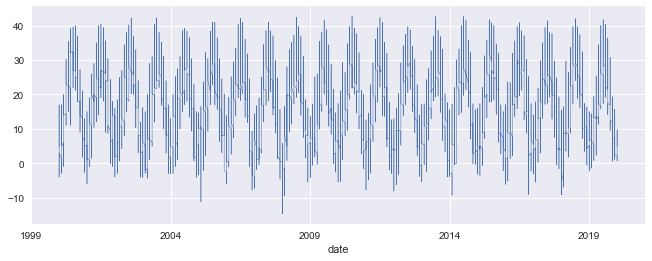

In [12]:
sns.set(rc={'figure.figsize':(11, 4)})
data['temp'].plot(linewidth=0.5);


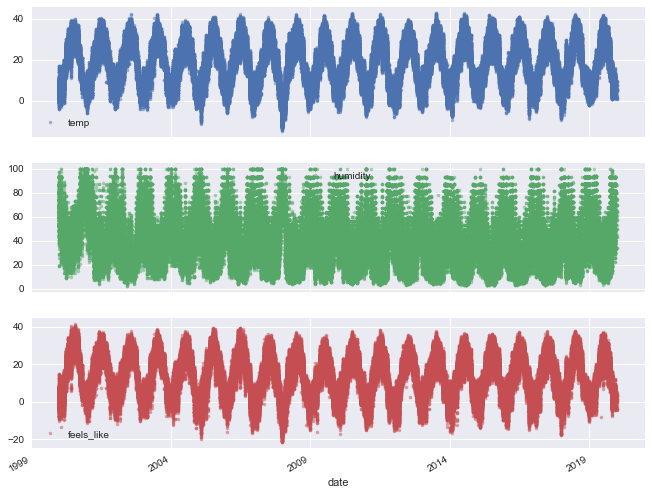

In [13]:
sns.set(rc={'figure.figsize':(11, 4)})
cols_plot = ['temp', 'humidity', 'feels_like']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

In [37]:
# compute the mean of features base on years
data_columns = ['temp', 'feels_like', 'humidity', 'temp_min','temp_max','pressure','wind_speed']
# Resample to yearly frequency, aggregating with mean
opsd_weekly_mean = data[data_columns].resample('y').mean()
opsd_weekly_mean

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

# 5-clustering the wethear data using K-means algorithm

In [19]:
#select features of intresting for clustering
features = ['temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 
        'wind_speed','wind_deg']
select_df = data[features]
select_df.columns


Index(['temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg'],
      dtype='object')

In [20]:
#scale the features
X = StandardScaler().fit_transform(select_df)


In [28]:
#use K-means algorithm
kmeans = KMeans(n_clusters=20)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [29]:
#we select 12 centers for clustering
centers = model.cluster_centers_
centers

array([[-0.32910803, -0.28120501, -0.36149504, -0.19592145,  0.33022667,
        -0.52626871, -1.45614956],
       [ 0.54665386,  0.52529192,  0.5600558 , -0.21922378, -0.49518122,
        -0.28617754,  0.73399854],
       [ 1.51739111,  1.53598096,  1.4882753 , -1.91294377, -1.0181467 ,
        -0.34247679, -1.08099305],
       [-1.13202733, -1.16313334, -1.12146674,  0.40340829,  0.68893301,
         1.87572027,  0.72916588],
       [-0.79615862, -0.75023598, -0.82498274,  1.23180351, -0.04886988,
        -0.71803912, -0.95711937],
       [-0.16400823, -0.15733993, -0.16372132,  0.15974266,  0.89524652,
        -0.2835564 ,  0.71681951],
       [-0.05756141, -0.11073516, -0.02958873, -0.09972966, -0.02092824,
         1.23295622,  0.70486767],
       [ 1.084696  ,  1.08322069,  1.07386918, -1.27144563, -0.7913907 ,
        -0.2553    ,  0.75190394],
       [ 0.33502518,  0.2704051 ,  0.37303058, -0.75200141, -0.0462282 ,
         3.01566564,  0.74480019],
       [-0.98777008, -0.9883

In [30]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

	 # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [31]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [32]:
P = pd_centers(features, centers)


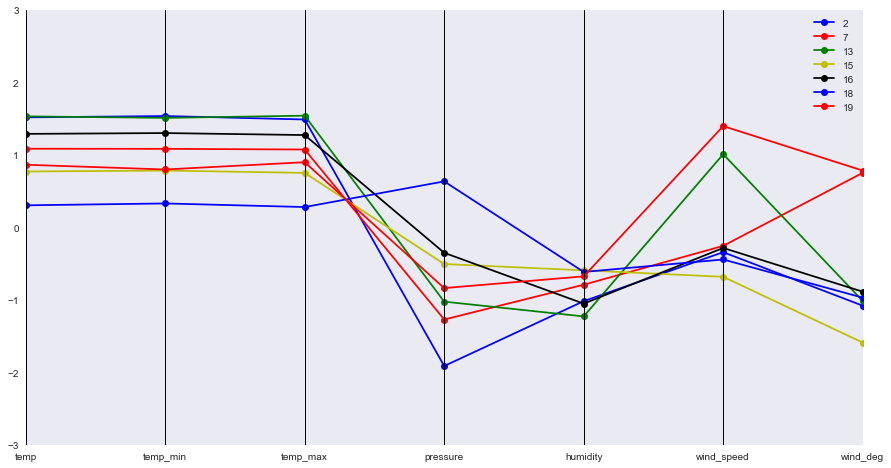

In [33]:
#Dry days
parallel_plot(P[P['humidity'] < -0.5])


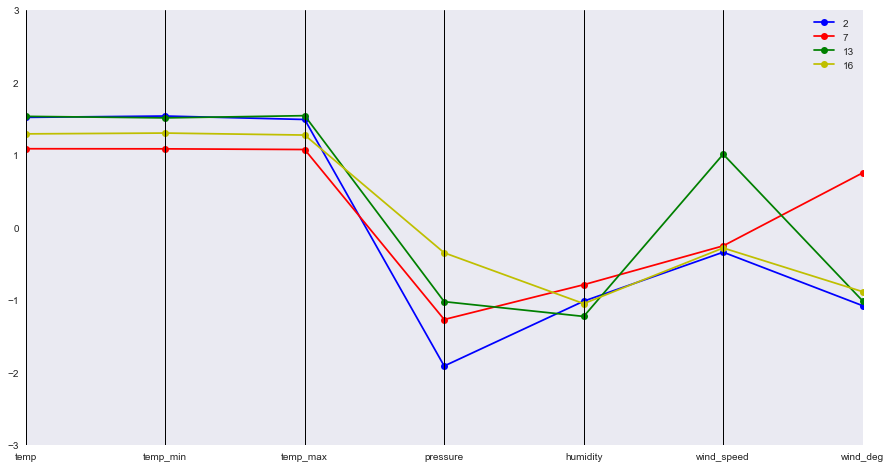

In [37]:
#warm days
parallel_plot(P[P['temp'] > 1])

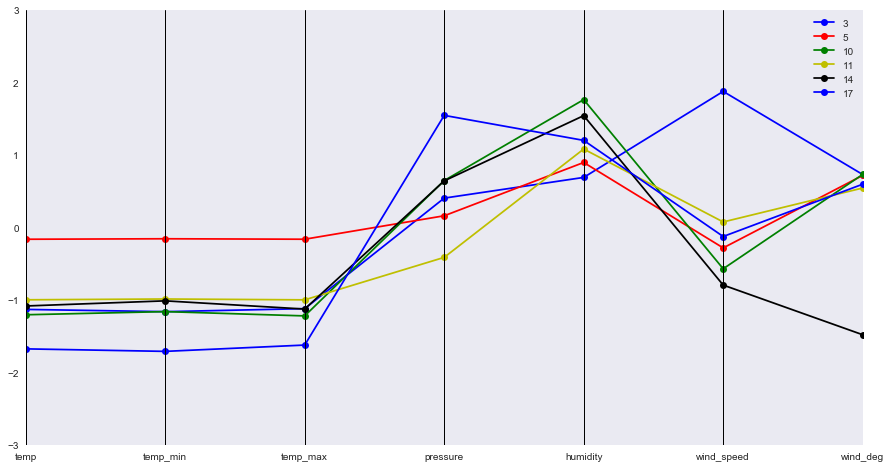

In [38]:
#cool days
parallel_plot(P[(P['humidity'] > 0.5) & (P['temp'] < 0.5)])
